In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
cars=pd.read_csv('/Cars.csv')

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [9]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [10]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

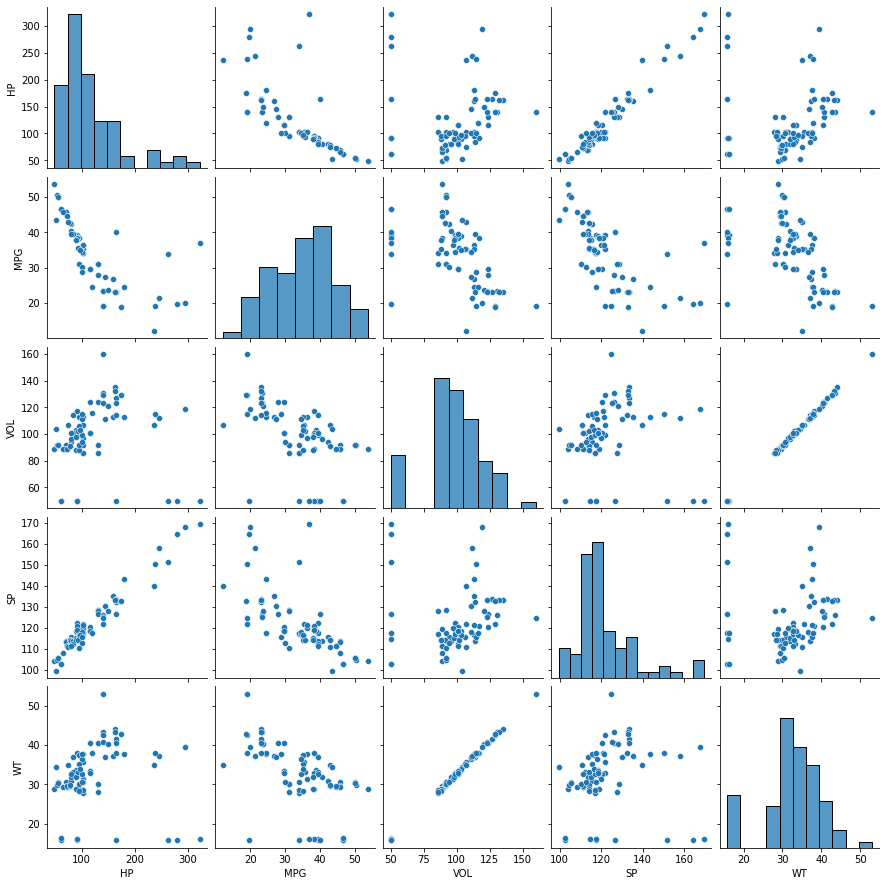

In [12]:
sns.pairplot(cars)

In [11]:
model = smf.ols("MPG~HP+VOL+WT+SP",data=cars).fit()

In [13]:
print(model.tvalues,'\n', model.pvalues)

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
WT           0.236541
SP           2.499880
dtype: float64 
 Intercept    0.042936
HP           0.000001
VOL          0.556294
WT           0.813649
SP           0.014579
dtype: float64


In [14]:
print(model.rsquared,model.rsquared_adj)

0.7705372737359844 0.7584602881431415


In [15]:
hp=smf.ols('HP~SP+VOL+WT',data=cars).fit()

In [16]:
hp_rsquared = hp.rsquared
hp_rsquared

0.9498157963084058

In [17]:
vif_hp = 1/(1-hp_rsquared)
vif_hp

19.92658897499852

In [19]:
vol_rsquared=smf.ols('VOL~HP+SP+WT',data=cars).fit().rsquared
vif_vol=1/(1-vol_rsquared)
vif_vol

638.8060836592878

In [18]:
sp_rsquared=smf.ols('SP~HP+VOL+WT',data=cars).fit().rsquared
vif_sp=1/(1-sp_rsquared)
vif_sp

20.00763878305008

In [20]:
wt_rsquared=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-wt_rsquared)
vif_wt

639.5338175572624

In [21]:
a = {'x':["HP","VOL","SP","WT"],'VIF':[vif_hp,vif_vol,vif_sp,vif_wt]}
vif = pd.DataFrame(a)
vif

,x,VIF
0,HP,19.926589
1,VOL,638.806084
2,SP,20.007639
3,WT,639.533818


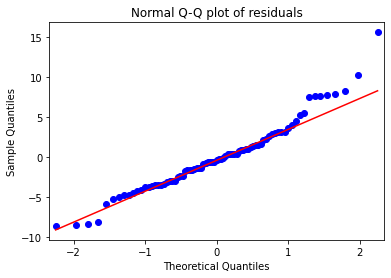

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [23]:
list(np.where(model.resid>10))

[array([ 0, 76])]

In [24]:
# standardise the values is nothing but the z-scores means normalizing the errors
def get_standardized_values(vals):
    return(vals-vals.mean()/vals.std())

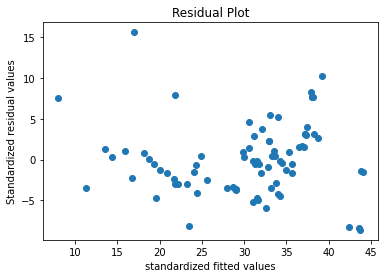

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

In [26]:
# Residual vs regressors

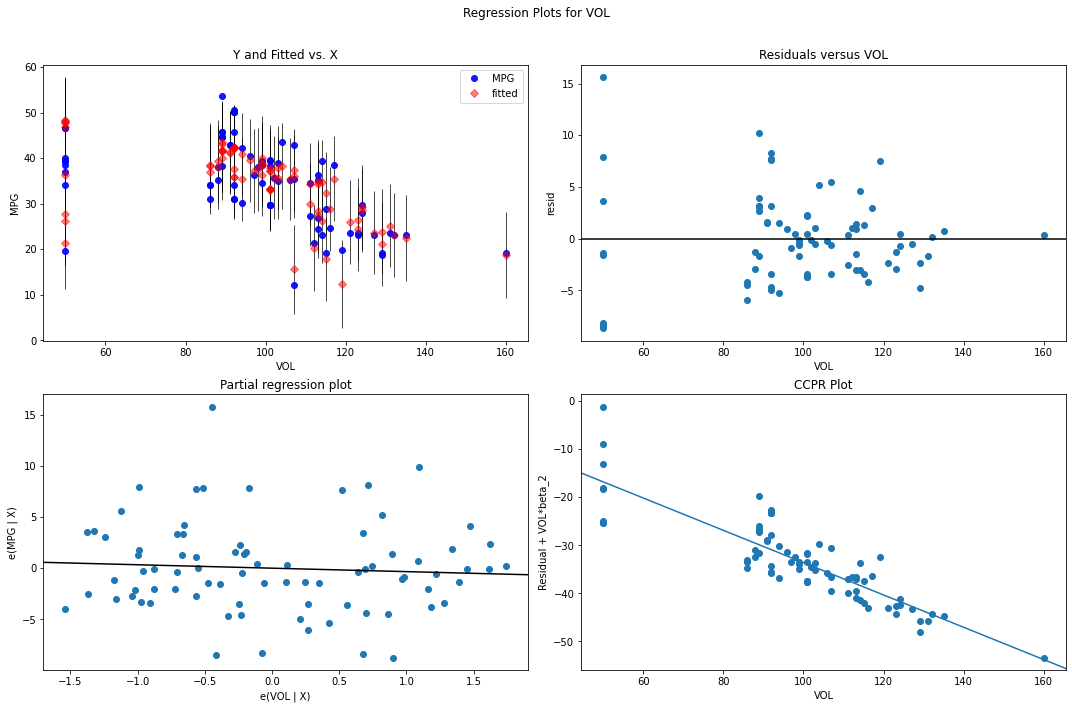

In [ ]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

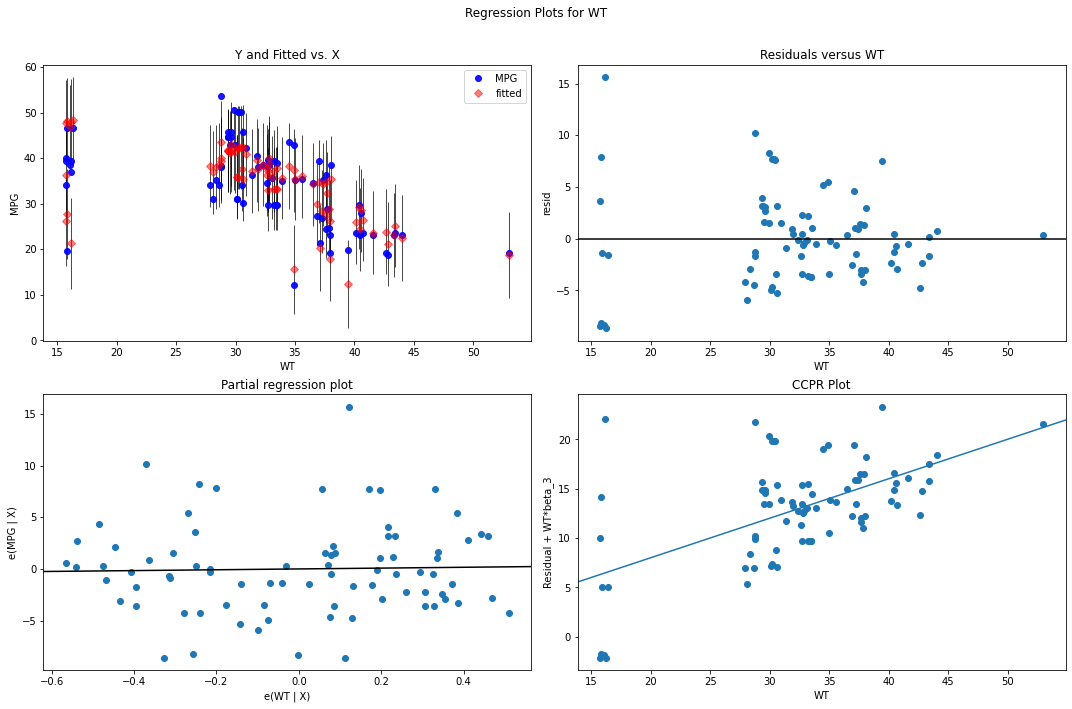

In [27]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

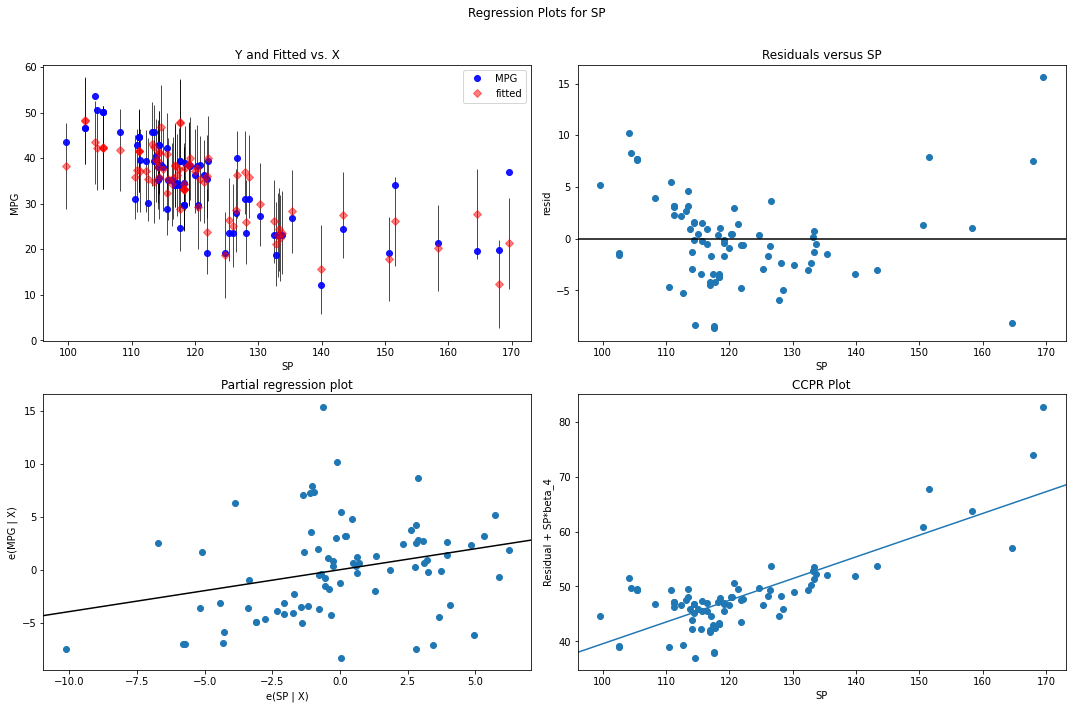

In [28]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

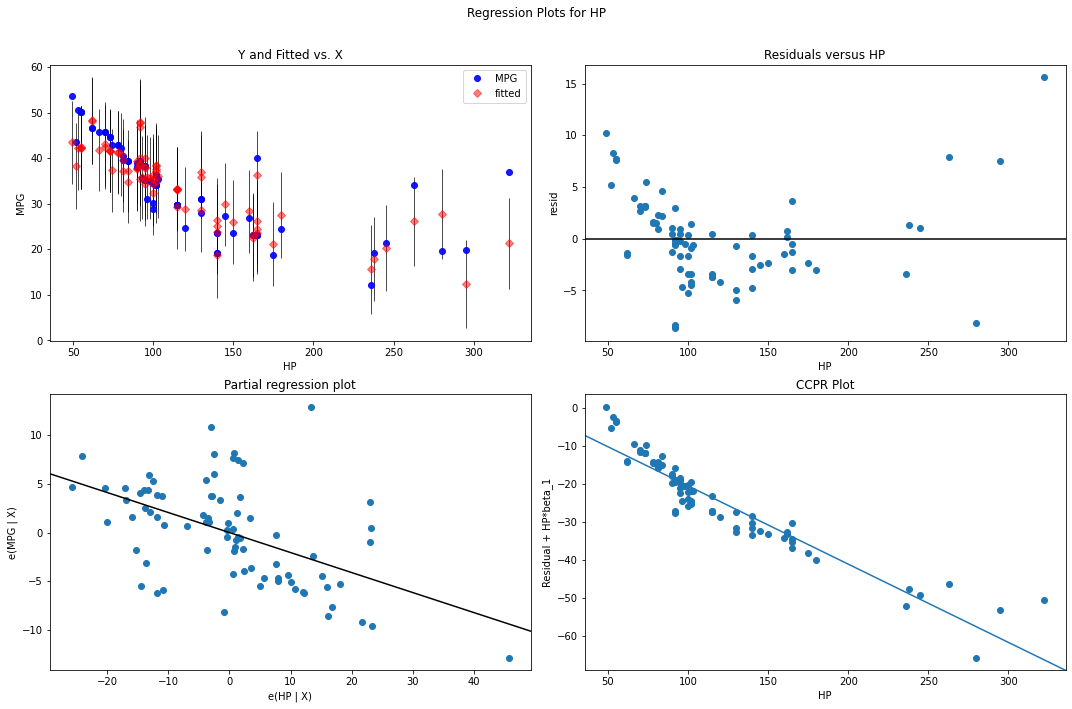

In [29]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

In [30]:
# Deletion diagnosis - detect influencers & outliers

In [31]:
#Cooks distance

In [33]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

In [34]:
# Stem Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


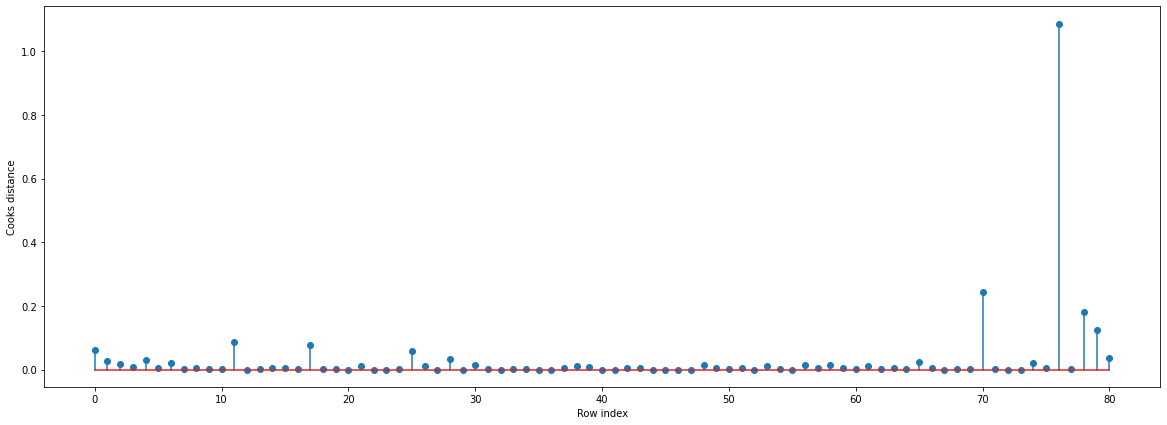

In [36]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [37]:
# influencer point index & value

In [38]:
np.argmax(c),np.max(c)

(76, 1.0865193998179914)

In [39]:
#High influencer

In [40]:
from statsmodels.graphics.regressionplots import influence_plot

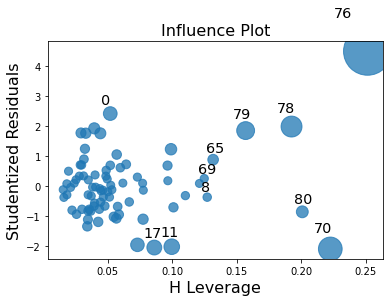

In [42]:
influence_plot(model)
plt.show()

In [44]:
k=cars.shape[1]
p=cars.shape[0]
leverage_cutoff = 3*((k+1)/p)
k

5

In [45]:
p

81

In [46]:
leverage_cutoff

0.2222222222222222

In [49]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [48]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [50]:
cars_new=pd.read_csv('/Cars.csv')

In [52]:
cars1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()    # discrad the rows & reset the index

In [53]:
cars1=cars1.drop(['index'],axis=1)

In [54]:
cars1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [60]:
model_1 = smf.ols('MPG~HP+VOL+SP',data=cars1).fit()

In [61]:
model_1.rsquared

0.8161692010376007

In [62]:
model_1.aic

446.11722639447726

In [63]:
model_2 = smf.ols('MPG~HP+WT+SP',data=cars1).fit()

In [64]:
model_2.rsquared

0.8160034320495304

In [65]:
model_2.aic

446.18843235750313

In [67]:
# include only vol instead of WT since Rsquared & aic values are higher

In [72]:
model_1_influence=model_1.get_influence()
(c_1,_)=model_1_influence.cooks_distance
np.argmax(c_1),np.max(c_1)

(76, 1.1629387469135333)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


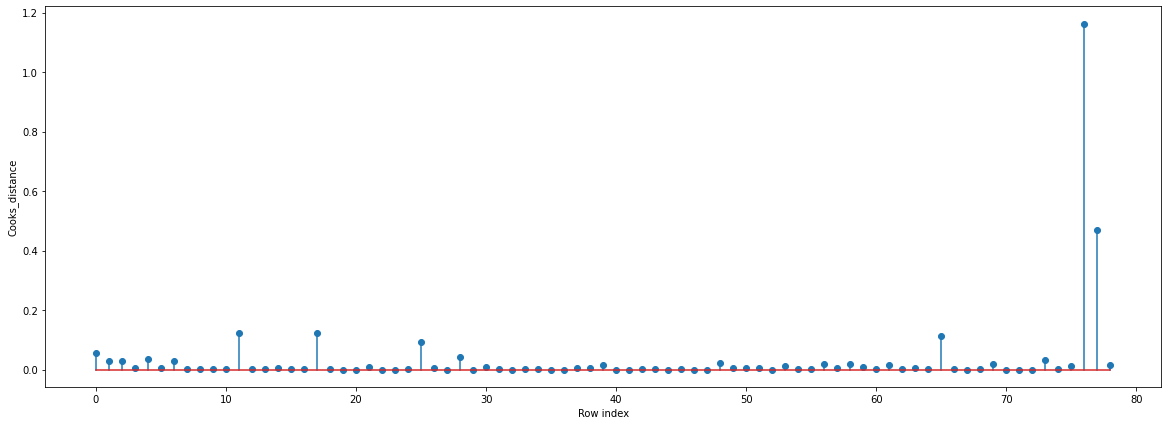

In [77]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars1)),np.round(c_1,3))
plt.xlabel('Row index')
plt.ylabel('Cooks_distance')
plt.show()

In [85]:
cars2=cars1.drop(cars1.index[[77,76]],axis=0).reset_index()

In [83]:
cars2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [86]:
cars3=cars2.drop(['index'],axis=1)

In [87]:
model_final=smf.ols('MPG~VOL+SP+HP',data=cars3).fit()

In [91]:
model_final.rsquared,model_final.rsquared_adj

(0.866963611185906, 0.8614963623305323)

In [90]:
model_final.aic

409.41530627195095

In [94]:
final_influence=model_final.get_influence()
(c_f,_)=final_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


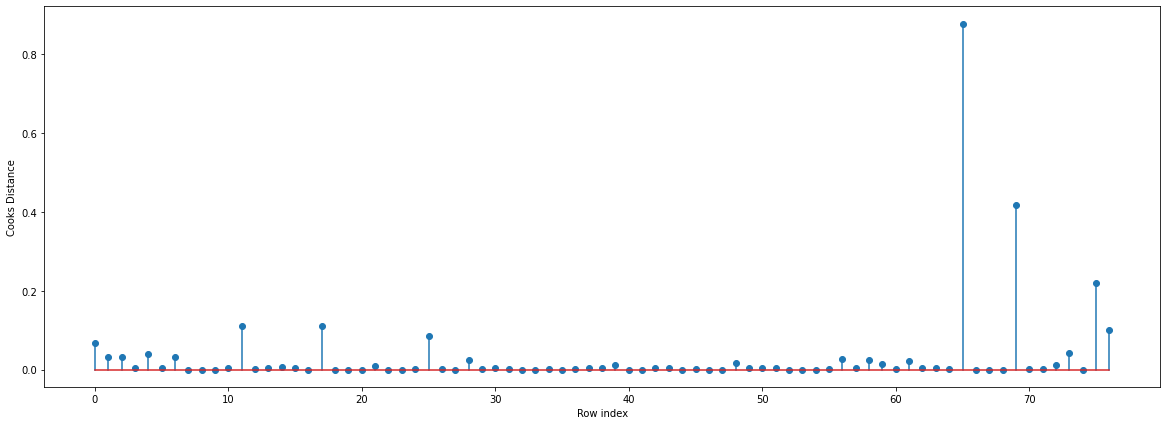

In [99]:
fig=plt.subplots(figsize=[20,7])
plt.stem(np.arange(len(cars3)),np.round(c_f,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [100]:
(np.argmax('index'),np.max(c_f))

(0, 0.8774556986296681)

In [101]:
final_model=smf.ols('MPG~VOL+SP+HP',data=cars3).fit()

In [102]:
final_model.rsquared

0.866963611185906

In [103]:
final_model.aic

409.41530627195095

In [104]:
# new prediction

In [106]:
data_new=pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=[1])

In [107]:
data_new

,HP,VOL,SP,WT
1,40,95,102,35


In [109]:
final_model.predict(data_new)

1    46.035594
dtype: float64